## Image Matching

Image matching is an important concept in computer vision and object recognition. The images of the same subject can be acquired from different angles, lighting and scales. Therefore, it is best to find features that are descriptive and invariant to the aforementioned variations in order to categorize the images correctly.

SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

In [106]:
!pip install opencv-contrib-python==3.4.2.17

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import glob

### Sift features



In [109]:
# file1 = open("temp.txt", "w+")
path1 = '/content/drive/MyDrive/class project/foreheadData/*_S1_*.jpg'
path2 = '/content/drive/MyDrive/class project/foreheadData/*_S2_*.jpg'
genuine = []
imposter = []
sift = cv2.xfeatures2d.SIFT_create()
norm = cv2.NORM_L2
bf = cv2.BFMatcher(norm)

for images in glob.glob(path1):
    
    identity1 = images.split('.jpg')[0].split('/')[-1].split('_')[0]
    img1 = cv2.imread(images)
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in glob.glob(path2):

            identity2 = image.split('.jpg')[0].split('/')[-1].split('_')[0]
            
            img2 = cv2.imread(image) # trainImage
            
            kp2, des2 = sift.detectAndCompute(img2,None)
            try:
                matches = bf.knnMatch(des1,des2, k=2)
                dis = bf.match(des1,des2)
                number_keypoints = 0
                if len(kp1) <= len(kp2):
                    number_keypoints = len(kp1)
                else:
                    number_keypoints = len(kp2)
                good = []
                for m,n in matches:
                    if m.distance < 0.7*n.distance:
                        good.append([m])

                score = len(good) / number_keypoints
                if identity1==identity2:
                    genuine.append(score)
                   
                else:
                    imposter.append(score)

                print(images + " " + image + " " + str(score)) # replace with 'cos' if using cosine similarity
            except:
                print(images + " " + image + " no key points found" )
# file1.close()
print(len(genuine))
print(len(imposter))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/8_P1_S2_1.jpg 0.0
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/8_P1_S2_2.jpg 0.0
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/8_P1_S2_3.jpg 0.0
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/8_P2_S2_1.jpg 0.0
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/8_P2_S2_2.jpg 0.0
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/8_P2_S2_3.jpg 0.15384615384615385
/content/drive/MyDrive/class project/foreheadData/23_P2_S1_3.jpg /content/drive/MyDrive/class project/foreheadData/9_P1_S2_1.jpg 0.0
/c

In [110]:
max(genuine)

2.3333333333333335

In [111]:
max(imposter)

10.333333333333334

In [112]:
total_match_comparisons = len(genuine)+len(imposter)

In [113]:
def calculate_metric(threshold):
    correct_acceptance = list(filter(lambda x: x > threshold, genuine))
    correct_rejection =list(filter(lambda x: x < threshold, imposter))
    false_acceptance = list(filter(lambda x: x > threshold, imposter))
    false_rejection = list(filter(lambda x: x <= threshold, genuine))
    crr = (len(correct_acceptance)+len(correct_rejection)) / total_match_comparisons
    far = len(false_acceptance) / total_match_comparisons
    frr = len(false_rejection) / total_match_comparisons
    return crr, far, frr

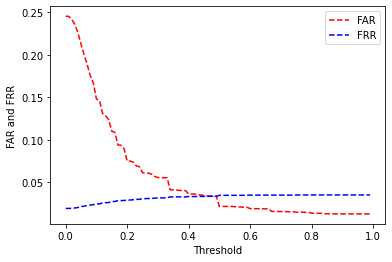

In [114]:
far_values = []
frr_values = []
crr_values = []
thresholds = []
# max_accuracy = 0
# thres = 0
for i in range(0, 100):
    crr, far, frr = calculate_metric(i*0.01)
    acc = 100-(far+frr)*100/2
    far_values.append(far)
    frr_values.append(frr)
    crr_values.append(crr)
    thresholds.append(i*0.01)
    
#     if max_accuracy <= acc:
#         max_accuracy = acc
#         thres = x*0.01
        
plt.plot(thresholds, far_values, 'r--' ,label='FAR')
plt.plot(thresholds, frr_values, 'b--' ,label = 'FRR')
plt.xlabel("Threshold")
plt.ylabel("FAR and FRR")
plt.legend()
plt.show()
# print("Accuracy = ", max_accuracy)

In [115]:
far_values = [x*100 for x in far_values]


In [116]:
frr_values = [x*100 for x in frr_values]

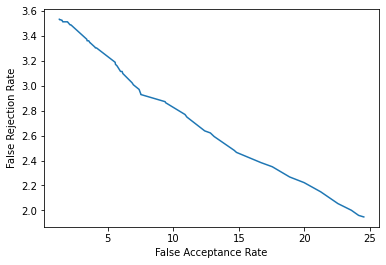

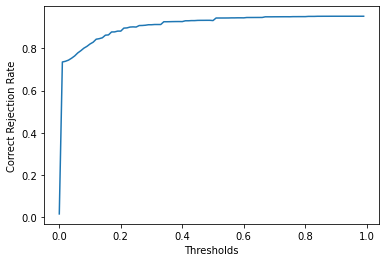

In [117]:
plt.plot(far_values, frr_values, label = 'False Rejection Rate vs False Acceptance Rate')
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.show()
plt.plot(thresholds, crr_values, label = 'Correct Rejection Rate vs Thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Correct Rejection Rate')
plt.show()

In [118]:
genuine_rounded_score = [round(x, 2) for x in genuine]
imposter_rounded_score = [round(x, 2) for x in imposter]

In [119]:
(unique, counts) = np.unique(genuine_rounded_score, return_counts=True)
genuine_score_frequency = np.asarray((unique, counts)).T
(unique, counts) = np.unique(imposter_rounded_score, return_counts=True)
imposter_score_frequency = np.asarray((unique, counts)).T

In [120]:
for i in range(len(genuine_score_frequency)):
    genuine_score_frequency[i][1] = 100*genuine_score_frequency[i][1]/len(genuine)
for i in range(len(imposter_score_frequency)):
    imposter_score_frequency[i][1] = 100*imposter_score_frequency[i][1]/len(imposter)

In [121]:
genuine_values = [genuine_score_frequency[x][0] for x in range(len(genuine_score_frequency))]
genuine_prob = [genuine_score_frequency[x][1] for x in range(len(genuine_score_frequency))]
imposter_values = [imposter_score_frequency[x][0] for x in range(len(imposter_score_frequency))]
imposter_prob = [imposter_score_frequency[x][1] for x in range(len(imposter_score_frequency))]

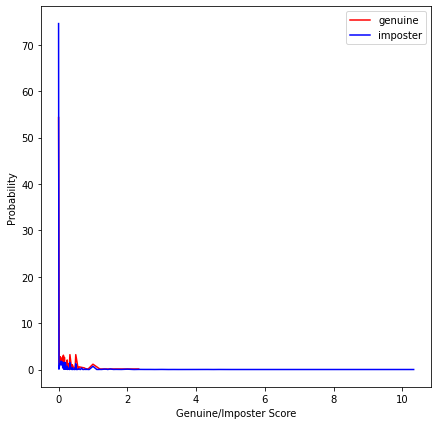

In [122]:
plt.figure(figsize= (7,7))
plt.plot(genuine_values, genuine_prob,'r' ,label='genuine')
plt.plot(imposter_values, imposter_prob, 'b' ,label='imposter')
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.xlabel('Genuine/Imposter Score')
plt.ylabel('Probability')
plt.legend()
plt.show()

Text(0, 0.5, 'Probability %')

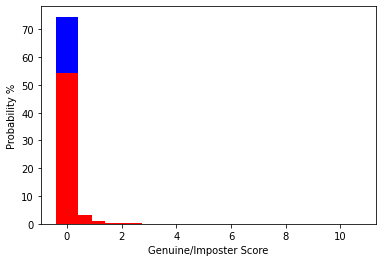

In [135]:
plt.bar(imposter_values, imposter_prob,align='center',color='b')
plt.bar(genuine_values,genuine_prob,align='center',color='r')

plt.xlabel('Genuine/Imposter Score')
plt.ylabel('Probability %')

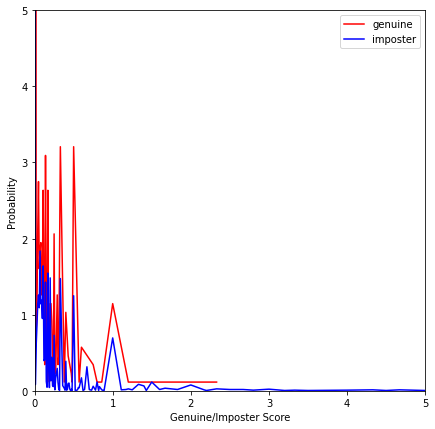

In [123]:
plt.figure(figsize= (7,7))
plt.plot(genuine_values, genuine_prob,'r' ,label='genuine')
plt.plot(imposter_values, imposter_prob, 'b' ,label='imposter')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Genuine/Imposter Score')
plt.ylabel('Probability')
plt.legend()
plt.show()

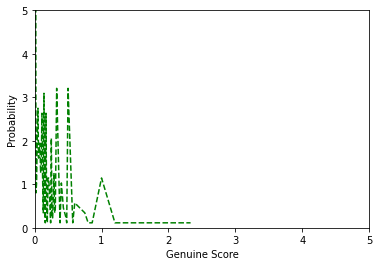

In [124]:
plt.plot(genuine_values, genuine_prob, 'g--')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Genuine Score')
plt.ylabel('Probability')
plt.show()

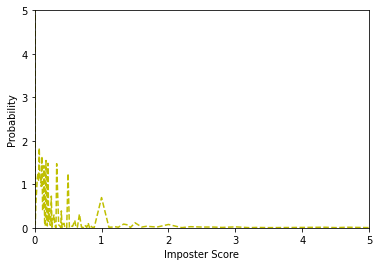

In [125]:
plt.plot(imposter_values, imposter_prob, 'y--')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Imposter Score')
plt.ylabel('Probability')
plt.show()

### EER and Threshold

In [126]:
min_diff = 100000
index = 0
for i in range(len(frr_values)):
    if abs(far_values[i]-frr_values[i])<=min_diff:
        min_diff = abs(far_values[i]-frr_values[i])
        index = i

In [127]:
thresholds[index] ## threshold

0.49

In [128]:
min_diff ## EER

0.012327922745017705

In [129]:
correct_acceptance = list(filter(lambda x: x > thresholds[index], genuine))
correct_rejection =list(filter(lambda x: x < thresholds[index], imposter))
false_acceptance = list(filter(lambda x: x > thresholds[index], imposter))
false_rejection = list(filter(lambda x: x <= thresholds[index], genuine))
crr = (len(correct_acceptance)+len(correct_rejection)) / total_match_comparisons
far = len(false_acceptance) / total_match_comparisons
frr = len(false_rejection) / total_match_comparisons

In [130]:
crr*100

93.24018902814876

In [131]:
far*100

3.3860694472981305

In [132]:
frr*100

3.373741524553113

In [133]:
acc = 100-(far+frr)*100/2

In [134]:
acc ## accuracy

96.62009451407438